In [21]:
import geopandas as gpd
import pandas as pd

import mapillary as mly

import glob

from datetime import datetime

import json
import requests


### osm-netzwerk einlesen

In [22]:
#set_date = "251010" 
#set_date = "251022" 
set_date = "251115" 


crossings=gpd.read_parquet(f"processed_osm_files/processed_crossings_germany_{set_date}.parquet")

print("number of crossings:", len(crossings))

number of crossings: 447138


In [23]:
crossings.head()

,other_tags,geometry
0,"""bicycle""=>""yes"",""button_operated""=>""yes"",""cro...",POINT (9.97756 53.54929)
1,"""crossing""=>""marked"",""crossing:island""=>""no"",""...",POINT (11.40738 48.17655)
2,"""crossing""=>""uncontrolled"",""crossing:island""=>...",POINT (11.4145 48.15711)
3,"""bicycle""=>""yes"",""crossing""=>""unmarked"",""cross...",POINT (11.43632 48.16963)
4,"""crossing""=>""unmarked"",""crossing:markings""=>""n...",POINT (11.42894 48.16139)


In [104]:
#filtered_cycleways.highway.value_counts()

### mapillary traffic signs einlesen

In [2]:


## TRAFFFIC SIGNS
# https://www.mapillary.com/developer/api-documentation/traffic-signs?locale=


### EINLESEN

# Find all parquet files in the tile_cache folder (per state)
parquet_files = glob.glob("../../output/*.parquet")
# Extract and print the dates from the filenames
dates = [f.split("_")[-1].replace(".parquet", "") for f in parquet_files]
# Drop all duplicates in the list
dates = list(set(dates))
print("Dates found in filenames:", dates)
# Read all files and concatenate into one GeoDataFrame
mapillary_trafficsigns = gpd.GeoDataFrame(
    pd.concat([gpd.read_parquet(f) for f in parquet_files], ignore_index=True),
    crs=gpd.read_parquet(parquet_files[0]).crs
)




### FILTERN

# Unterschiedliche Verkehrszeichen in Deutschland für Radwege


# Zebra Schilder in Deuscthland filtern

# https://en.wikipedia.org/wiki/Road_signs_in_Germany#/media/File:Zeichen_350-10_-_Fu%C3%9Fg%C3%A4nger%C3%BCberweg_(rechts),_StVO_1992.svg
# Pedestrian crossing
de_350="information--pedestrians-crossing--g1"



# filter to cw only
mapillary_trafficsigns_cross=mapillary_trafficsigns[mapillary_trafficsigns.value.isin([de_350])]
# drop duplicates if any
mapillary_trafficsigns_cross=mapillary_trafficsigns_cross.drop_duplicates(subset=['id'])

mapillary_trafficsigns_cross




Dates found in filenames: ['2025-11-16', '2025-11-15']


,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y
426,POINT (7.55172 47.80589),2021-12-18,469717964567840,2021-12-18,information--pedestrians-crossing--g1,8535,5708
427,POINT (7.55179 47.80571),2021-12-18,1008928649655954,2021-12-18,information--pedestrians-crossing--g1,8535,5708
507,POINT (7.55195 47.80581),2021-12-18,469717941234509,2021-12-18,information--pedestrians-crossing--g1,8535,5708
760,POINT (7.55701 47.73198),2022-08-30,3441653916068101,2022-08-30,information--pedestrians-crossing--g1,8535,5713
917,POINT (7.57756 47.84272),2021-07-20,218035520222972,2024-07-29,information--pedestrians-crossing--g1,8536,5705
...,...,...,...,...,...,...,...
6359213,POINT (8.93161 53.04158),2022-06-09,436975904939509,2022-06-09,information--pedestrians-crossing--g1,8598,5333
6359229,POINT (8.9315 53.04148),2022-06-09,436975894939510,2022-06-09,information--pedestrians-crossing--g1,8598,5333
6359230,POINT (8.93177 53.04135),2019-09-22,160195856077377,2019-09-22,information--pedestrians-crossing--g1,8598,5333
6359292,POINT (8.92495 53.03823),2019-09-22,224945832395473,2019-09-22,information--pedestrians-crossing--g1,8598,5334


<Axes: xlabel='last_seen_at'>

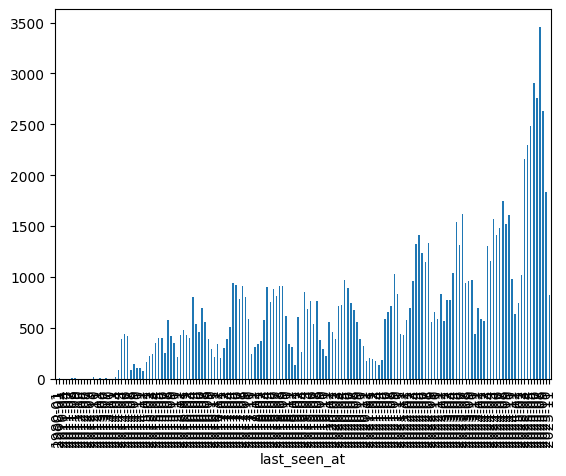

In [3]:
mapillary_trafficsigns_cross.last_seen_at.str[:-3].value_counts().sort_index().plot(kind="bar")


#### Zeitfilter 

In [4]:
##  is newer than 2025-01-01  


mapillary_trafficsigns_cross=mapillary_trafficsigns_cross[mapillary_trafficsigns_cross["last_seen_at"] > "2025-01-01"]
# mapillary_trafficsigns_237_recent
len(mapillary_trafficsigns_cross)

23086

In [5]:
mapillary_trafficsigns_cross

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y
968,POINT (7.57754 47.8426),2019-05-27,1185765528605921,2025-09-12,information--pedestrians-crossing--g1,8536,5706
976,POINT (7.57746 47.84265),2019-05-27,1186159971899810,2025-09-12,information--pedestrians-crossing--g1,8536,5706
1034,POINT (7.57751 47.84252),2025-09-12,1575080540321718,2025-09-12,information--pedestrians-crossing--g1,8536,5706
1130,POINT (7.55911 47.81387),2021-07-20,4298247753531184,2025-08-17,information--pedestrians-crossing--g1,8536,5707
1301,POINT (7.5592 47.81413),2020-08-15,3875040829217851,2025-09-12,information--pedestrians-crossing--g1,8536,5707
...,...,...,...,...,...,...,...
6345636,POINT (8.77463 53.07713),2025-03-24,1337844583925172,2025-03-24,information--pedestrians-crossing--g1,8591,5331
6345821,POINT (8.77458 53.07706),2025-03-24,1337844580591839,2025-03-24,information--pedestrians-crossing--g1,8591,5331
6345985,POINT (8.77498 53.07704),2025-03-16,1200094914989576,2025-03-16,information--pedestrians-crossing--g1,8591,5331
6353625,POINT (8.84253 53.08861),2025-06-20,1312230480553106,2025-06-20,information--pedestrians-crossing--g1,8594,5330


<Axes: xlabel='last_seen_at'>

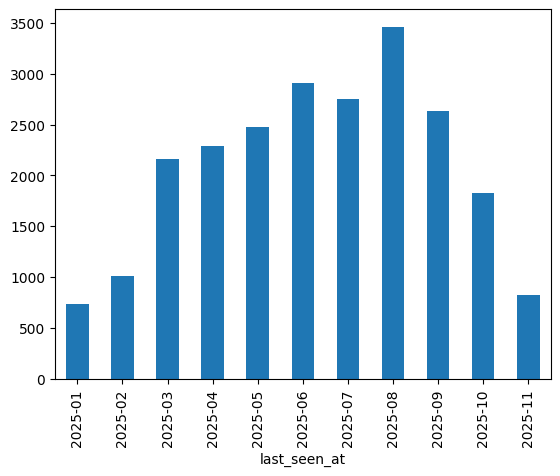

In [6]:
mapillary_trafficsigns_cross.last_seen_at.str[:-3].value_counts().sort_index().plot(kind="bar")


In [7]:
##  at least 12 months between first and last seen (to avoid temporary signs)
## might need to adjust this


zeitspanne = 12

def months_between(date1, date2):
    d1 = datetime.strptime(date1, "%Y-%m-%d")
    d2 = datetime.strptime(date2, "%Y-%m-%d")
    return abs((d2.year - d1.year) * 12 + d2.month - d1.month)

mapillary_trafficsigns_cross_temp = mapillary_trafficsigns_cross[
    mapillary_trafficsigns_cross.apply(lambda row: months_between(row['first_seen_at'], row['last_seen_at']) >= zeitspanne, axis=1)
]
len(mapillary_trafficsigns_cross_temp)

11435

<Axes: xlabel='last_seen_at'>

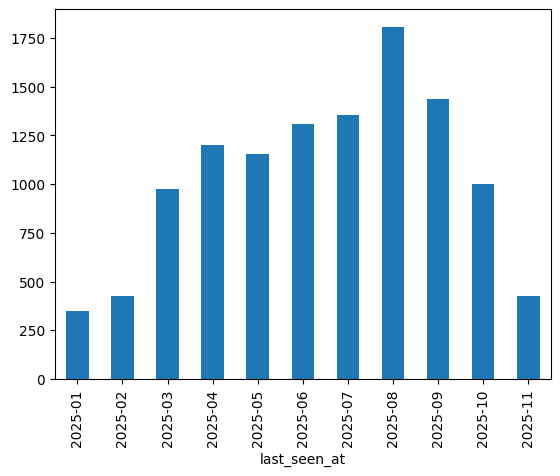

In [8]:
mapillary_trafficsigns_cross_temp.last_seen_at.str[:-3].value_counts().sort_index().plot(kind="bar")



<Axes: >

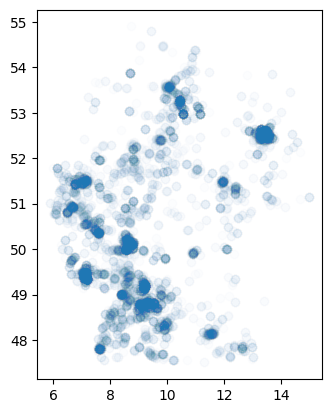

In [9]:
mapillary_trafficsigns_cross_temp.plot(alpha=0.01)

#### Räumliche Prüfung 

In [24]:
## now create a buffer around the traffic signs to check if there is a cycleway nearby
df_buffered_30 = mapillary_trafficsigns_cross_temp.to_crs(25833).copy()


#df_buffered["geometry"] = df_buffered.geometry.buffer(50)
#df_buffered["geometry"] = df_buffered.geometry.buffer(40)
df_buffered_30["geometry"] = df_buffered_30.geometry.buffer(50)



df_buffered_30 = df_buffered_30.to_crs(mapillary_trafficsigns_cross_temp.crs)



In [25]:
# helper 
def mark_intersections(buffered_df, target_layer, column_name="has_intersection"):
    """
    Marks which geometries in `buffered_df` intersect with `target_layer`.

    Parameters:
    - buffered_df (GeoDataFrame): The GeoDataFrame containing buffered geometries.
    - target_layer (GeoDataFrame): The GeoDataFrame to check for intersections (e.g., cycleways, motorways).
    - column_name (str): Name of the column to add/overwrite in `buffered_df` indicating intersection (bool).

    Returns:
    - GeoDataFrame: `buffered_df` with a new boolean column `column_name`.
    """
    # Ensure CRS matches
    buffered_df = buffered_df.to_crs(target_layer.crs)

    # Perform spatial join to find intersecting geometries
    joined = gpd.sjoin(buffered_df, target_layer, how="inner", predicate="intersects")

    # Initialize the new column to False
    buffered_df[column_name] = False

    # Set True for geometries that intersect
    matches = joined.index.unique()
    buffered_df.loc[matches, column_name] = True

    return buffered_df


In [26]:
# For crossings
df_buffered_30 = mark_intersections(df_buffered_30, crossings, column_name="has_cross_intersection")


df_buffered_30["buffer_size"] = 50



In [27]:
#df_buffered.id.unique()

In [28]:
# An wie vielen Schilder ist ein Crossing in der Nähe?
df_buffered_30.has_cross_intersection.value_counts()

has_cross_intersection
True     11296
False      139
Name: count, dtype: int64

In [29]:
df_buffered_30_false=df_buffered_30[(df_buffered_30.has_cross_intersection== False)].copy()
len(df_buffered_30_false)

139

In [30]:
df_buffered_30_false.explore()

In [31]:
df_buffered_30_false

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_cross_intersection,buffer_size
35906,"POLYGON ((7.86354 48.31044, 7.86354 48.31039, ...",2020-08-24,375741240500588,2025-04-25,information--pedestrians-crossing--g1,8549,5674,False,50
62217,"POLYGON ((8.07602 48.53104, 8.07602 48.53099, ...",2021-09-17,392467478901133,2025-11-05,information--pedestrians-crossing--g1,8559,5659,False,50
62230,"POLYGON ((8.07595 48.53116, 8.07595 48.53111, ...",2021-09-17,392467622234452,2025-11-05,information--pedestrians-crossing--g1,8559,5659,False,50
86264,"POLYGON ((8.29545 47.89234, 8.29545 47.89229, ...",2023-10-10,329366059842042,2025-09-16,information--pedestrians-crossing--g1,8569,5702,False,50
102395,"POLYGON ((8.38025 48.9866, 8.38026 48.98655, 8...",2019-06-09,488531182563734,2025-10-28,information--pedestrians-crossing--g1,8573,5627,False,50
...,...,...,...,...,...,...,...,...,...
5324336,"POLYGON ((12.46979 50.35653, 12.46979 50.35649...",2019-06-04,115284917290572,2025-09-06,information--pedestrians-crossing--g1,8759,5531,False,50
5852559,"POLYGON ((14.56291 52.34876, 14.56291 52.34872...",2020-08-07,527709268607193,2025-09-21,information--pedestrians-crossing--g1,8854,5386,False,50
5852857,"POLYGON ((14.56271 52.34872, 14.56271 52.34867...",2019-05-30,164804892254207,2025-09-21,information--pedestrians-crossing--g1,8854,5386,False,50
5853026,"POLYGON ((14.56784 52.34866, 14.56783 52.34861...",2019-05-30,803423570284477,2025-05-21,information--pedestrians-crossing--g1,8854,5386,False,50


In [32]:
import numpy as np
import pandas as pd
import geopandas as gpd

def deduplicate_intersecting_polygons(
    gdf: gpd.GeoDataFrame,
    last_seen_col: str = "last_seen_at",
    first_seen_col: str = "first_seen_at",
    predicate: str = "intersects",  # z.B. "overlaps" wenn reine Randberührung ignoriert werden soll
):
    """
    Dedupliziert sich überschneidende Polygone in zusammenhängenden Intersections-Komponenten.
    Prioritäten pro Komponente:
      1) max(last_seen_at)
      2) max(last_seen_at - first_seen_at) in Tagen
      3) stabile Tie-Breaker: niedrigster Ausgangsindex
    """
    if gdf.empty:
        return gdf.copy()

    # Copy + stabiler Originalindex
    gdf = gdf.reset_index(drop=False).rename(columns={"index":"_orig_index"}).copy()

    # Datumsfelder robust konvertieren
    gdf["_last_seen_ts"]  = pd.to_datetime(gdf[last_seen_col],  errors="coerce")
    gdf["_first_seen_ts"] = pd.to_datetime(gdf[first_seen_col], errors="coerce")

    # Spannweite in Tagen (NaT -> sehr klein)
    span_days = (gdf["_last_seen_ts"] - gdf["_first_seen_ts"]).dt.days
    gdf["_span_days"] = span_days.fillna(-1_000_000)
    # Für Sortierung: NaT als sehr alt behandeln
    gdf["_last_ord"] = gdf["_last_seen_ts"].fillna(pd.Timestamp.min)

    # ---------- Intersections: kompatible Ermittlung der Paare ----------
    sindex = gdf.sindex

    def build_pairs(sindex, gdf, predicate):
        """
        Liefert ein ndarray shape (m,2) mit Index-Paaren (i,j), i<j,
        je nach verfügbarer SIndex-API:
        - query_bulk (schnell)
        - query mit predicate (mittel)
        - intersection(bounds) + exakter Prädikat-Check (fallback)
        """
        # 1) Schneller Bulk-Weg (pygeos/pygeos-backed oder moderne shapely)
        if hasattr(sindex, "query_bulk"):
            li, ri = sindex.query_bulk(gdf.geometry, predicate=predicate)
            mask = li < ri
            return np.stack([li[mask], ri[mask]], axis=1) if mask.any() else np.empty((0,2), dtype=int)

        pairs = []

        # 2) Per-Geometry query mit predicate (falls vorhanden)
        if hasattr(sindex, "query"):
            # prüfen, ob predicate-Argument akzeptiert wird
            accepts_predicate = False
            try:
                _ = sindex.query(gdf.geometry.iloc[0], predicate=predicate)
                accepts_predicate = True
            except TypeError:
                accepts_predicate = False

            for i, geom in enumerate(gdf.geometry):
                if geom is None or geom.is_empty:
                    continue
                if accepts_predicate:
                    hits = sindex.query(geom, predicate=predicate)
                else:
                    # ohne predicate → Kandidaten per bbox, dann exakt filtern
                    hits = sindex.query(geom)
                    hits = [j for j in hits if getattr(geom, predicate)(gdf.geometry.iloc[j])]
                for j in hits:
                    if i < j:
                        pairs.append((i, j))
            return np.array(pairs, dtype=int) if pairs else np.empty((0,2), dtype=int)

        # 3) Älteres rtree-Interface: intersection(bounds)
        if hasattr(sindex, "intersection"):
            for i, geom in enumerate(gdf.geometry):
                if geom is None or geom.is_empty:
                    continue
                # Kandidaten via BBox, dann exakter Prädikat-Test
                for j in sindex.intersection(geom.bounds):
                    if i < j:
                        other = gdf.geometry.iloc[j]
                        if other is None or other.is_empty:
                            continue
                        if getattr(geom, predicate)(other):
                            pairs.append((i, j))
            return np.array(pairs, dtype=int) if pairs else np.empty((0,2), dtype=int)

        # Wenn gar nichts passt
        raise AttributeError("SpatialIndex bietet weder query_bulk, query noch intersection().")

    pairs = build_pairs(sindex, gdf, predicate=predicate)

    if pairs.size == 0:
        # Keine Überschneidungen → Originalreihenfolge zurück
        return (
            gdf.drop(columns=["_orig_index","_last_seen_ts","_first_seen_ts","_span_days","_last_ord"])
               .set_index("_orig_index").sort_index().reset_index(drop=True)
        )

    # ---------- Union-Find ----------
    n = len(gdf)
    parent = np.arange(n, dtype=int)
    rank = np.zeros(n, dtype=int)

    def find(x):
        while parent[x] != x:
            parent[x] = parent[parent[x]]
            x = parent[x]
        return x

    def union(a, b):
        ra, rb = find(a), find(b)
        if ra == rb: return
        if rank[ra] < rank[rb]:
            parent[ra] = rb
        elif rank[ra] > rank[rb]:
            parent[rb] = ra
        else:
            parent[rb] = ra
            rank[ra] += 1

    for a, b in pairs:
        union(int(a), int(b))

    roots = np.fromiter((find(i) for i in range(n)), dtype=int, count=n)

    # ---------- Auswahl je Komponente ----------
    # Sortierschlüssel: 1) last_seen desc, 2) span_days desc, 3) _orig_index asc
    order = np.lexsort((
        gdf["_orig_index"].to_numpy(),
        -gdf["_span_days"].to_numpy(),
        -gdf["_last_ord"].view("int64").to_numpy(),
    ))

    seen = set()
    chosen = []
    for idx in order:
        r = roots[idx]
        if r not in seen:
            chosen.append(idx)
            seen.add(r)

    result = gdf.iloc[sorted(chosen)].copy()

    # Aufräumen
    result = result.drop(columns=["_orig_index","_last_seen_ts","_first_seen_ts","_span_days","_last_ord"])
    return result.reset_index(drop=True)


In [33]:
df_buffered_30_false_dedup = deduplicate_intersecting_polygons(
    df_buffered_30_false,
    last_seen_col='last_seen_at',
    first_seen_col='first_seen_at'
)
df_buffered_30_false = df_buffered_30_false_dedup.copy()
len(df_buffered_30_false)


/tmp/ipykernel_486767/2345362028.py:136: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  -gdf["_last_ord"].view("int64").to_numpy(),


74

In [34]:
df_buffered_30_false.explore()

In [35]:
df_buffered_30_false

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_cross_intersection,buffer_size
0,"POLYGON ((7.86354 48.31044, 7.86354 48.31039, ...",2020-08-24,375741240500588,2025-04-25,information--pedestrians-crossing--g1,8549,5674,False,50
1,"POLYGON ((8.07602 48.53104, 8.07602 48.53099, ...",2021-09-17,392467478901133,2025-11-05,information--pedestrians-crossing--g1,8559,5659,False,50
2,"POLYGON ((8.29545 47.89234, 8.29545 47.89229, ...",2023-10-10,329366059842042,2025-09-16,information--pedestrians-crossing--g1,8569,5702,False,50
3,"POLYGON ((8.38025 48.9866, 8.38026 48.98655, 8...",2019-06-09,488531182563734,2025-10-28,information--pedestrians-crossing--g1,8573,5627,False,50
4,"POLYGON ((8.4943 47.95183, 8.4943 47.95178, 8....",2016-04-01,507439040441659,2025-07-17,information--pedestrians-crossing--g1,8578,5698,False,50
...,...,...,...,...,...,...,...,...,...
69,"POLYGON ((13.49695 52.53953, 13.49695 52.53948...",2021-12-30,1058175034915549,2025-09-16,information--pedestrians-crossing--g1,8806,5371,False,50
70,"POLYGON ((12.40424 51.34824, 12.40424 51.3482,...",2017-03-30,908916206347085,2025-04-19,information--pedestrians-crossing--g1,8756,5459,False,50
71,"POLYGON ((12.46968 50.35644, 12.46968 50.3564,...",2019-06-15,1177599836090263,2025-10-31,information--pedestrians-crossing--g1,8759,5531,False,50
72,"POLYGON ((14.56271 52.34872, 14.56271 52.34867...",2019-05-30,164804892254207,2025-09-21,information--pedestrians-crossing--g1,8854,5386,False,50


#### clean up from existing maproulette challenge

In [ ]:
# ### import the the flagged (not created, fixed) tasks from the challenge. 

# challenge_gdf = gpd.read_file("challenge_53589_flagged.geojson")
# #challenge_gdf.head()

# df_buffered_30_false = df_buffered_30_false.to_crs(4326)

# # Find intersections
# intersections = gpd.sjoin(df_buffered_30_false, challenge_gdf, how="left", predicate="intersects")

# # Keep only rows that do NOT intersect (i.e., no match in challenge_gdf)
# df_buffered_30_false_no_challenge = df_buffered_30_false.loc[intersections.index[intersections["index_right"].isna()]] 

# len(df_buffered_30_false_no_challenge)


200

In [36]:
### import the the flagged (not created, fixed) tasks from the challenge. 


with open("../utils/config_mapillary_privat.json", "r") as f:
    config = json.load(f)
API_KEY = config["API_KEY_MAPROULETTE"]

CHALLENGE_ID = 53589
BASE_URL = "https://maproulette.org/api/v2"

headers = {"apiKey": API_KEY}

# Single request to get all tasks as GeoJSON
r = requests.get(
    f"{BASE_URL}/challenge/view/{CHALLENGE_ID}",
    headers=headers
)
r.raise_for_status()
geojson_data = r.json()

# Convert directly to GeoDataFrame
challenge_gdf = gpd.GeoDataFrame.from_features(geojson_data, crs='EPSG:4326')



df_buffered_30_false = df_buffered_30_false.to_crs(4326)

# Find intersections
intersections = gpd.sjoin(df_buffered_30_false, challenge_gdf, how="left", predicate="intersects")

# Keep only rows that do NOT intersect (i.e., no match in challenge_gdf)
df_buffered_30_false_no_challenge = df_buffered_30_false.loc[intersections.index[intersections["index_right"].isna()]] 

len(df_buffered_30_false_no_challenge)

52

In [ ]:


# with open("../utils/config_mapillary_privat.json", "r") as f:
#     config = json.load(f)
# API_KEY = config["API_KEY_MAPROULETTE"]

# CHALLENGE_ID = 53589
# BASE_URL = "https://maproulette.org/api/v2"

# headers = {"apiKey": API_KEY}

# # Single request to get all tasks as GeoJSON
# r = requests.get(
#     f"{BASE_URL}/challenge/view/{CHALLENGE_ID}",
#     headers=headers
# )
# r.raise_for_status()
# geojson_data = r.json()

# # Convert directly to GeoDataFrame
# tasks_gdf = gpd.GeoDataFrame.from_features(geojson_data, crs='EPSG:4326')

# print(f"Anzahl Tasks: {len(tasks_gdf)}")
# print(f"Columns: {tasks_gdf.columns.tolist()}")

Anzahl Tasks: 176
Columns: ['geometry', 'osmid', 'mr_tags', 'image_id', 'mr_mapper', 'mr_taskId', 'instruction', 'mr_mappedOn', 'mr_reviewer', 'mr_taskName', 'mr_responses', 'mr_reviewedAt', 'mr_taskStatus', 'Verkehrzeichen', 'mr_challengeId', 'mr_reviewStatus', 'mr_taskPriority', 'mr_reviewTimeSeconds']


In [ ]:
#### TESTING

In [37]:
df_process_img= df_buffered_30_false_no_challenge.copy()
#df_process_img= df_buffered_30_false[:20].copy()


In [38]:
# -*- coding: utf-8 -*-
import os
import sys
import json
import time
import math
import logging
import requests
from contextlib import contextmanager
from datetime import datetime, timezone, timedelta
from concurrent.futures import ThreadPoolExecutor, as_completed

import pandas as pd
from tqdm import tqdm
from shapely.geometry import shape

# -----------------------------------------------------------------------------
# Ruhiger Logger + optional stdout-suppress
@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

for name in logging.root.manager.loggerDict:
    logging.getLogger(name).setLevel(logging.WARNING)
logging.basicConfig(level=logging.ERROR)

# -----------------------------------------------------------------------------
# Config & Konstanten
with open("../utils/config_mapillary_privat.json", "r") as f:
    config = json.load(f)
ACCESS_TOKEN = config["ACCESS_TOKEN"]

GRAPH = "https://graph.mapillary.com"

# --- Such-/Filter-Parameter ---
GEO_LIMIT       = 200          # pro Seite bei /images
GEO_MAX_PAGES   = 120          # maximale Seiten
RADIUS_M        = 50           # enger Suchradius um den Schild-Centroid (anpassbar)
MISMATCH_DAYS   = 1            # Feature-Bild darf max. so viel älter sein als last_seen_at
MIN_YEAR        = 2025         # nur Bilder ab diesem Jahr zulassen

# Sichtfeld-/Distanz-Filter
FOV_DEG          = 60          # horizontaler Sichtkegel
FOV_HALF_DEG     = FOV_DEG / 2
MAX_DIST_M       = 25          # max. Distanz Kamera -> Schild
TIME_WIN_PRIMARY = 1           # erst ±1 Tag um last_seen_at
TIME_WIN_FALLBK  = 7           # Fallback: ±7 Tage

# -----------------------------------------------------------------------------
# Zeit-Utils
def _dt_min():
    return datetime.min.replace(tzinfo=timezone.utc)

def _parse_ts(x):
    if x is None or x == "":
        return _dt_min()
    try:
        if isinstance(x, (int, float)):
            # Heuristik: ms vs. s
            if x > 1e12:
                return datetime.fromtimestamp(x/1000.0, tz=timezone.utc)
            return datetime.fromtimestamp(x, tz=timezone.utc)
        s = str(x).replace("Z", "+00:00")
        d = datetime.fromisoformat(s)
        if d.tzinfo is None:
            d = d.replace(tzinfo=timezone.utc)
        return d
    except Exception:
        return _dt_min()

def _best_ts(img):
    return (
        _parse_ts(img.get("captured_at")),
        _parse_ts(img.get("computed_captured_at")),
        _parse_ts(img.get("created_at")),
    )

def _main_ts(img):
    t1, t2, t3 = _best_ts(img)
    return t1 if t1 != _dt_min() else (t2 if t2 != _dt_min() else t3)

def _year_ok(dt):
    return dt and dt != _dt_min() and dt.year >= MIN_YEAR

def _in_time_window(ts, target, days):
    return abs((ts - target).total_seconds()) <= days * 86400

# -----------------------------------------------------------------------------
# Math-/Geo-Utils (FOV/Distanz/Heading)
def _haversine_m(lon1, lat1, lon2, lat2):
    R = 6371000.0
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlmb = math.radians(lon2 - lon1)
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlmb/2)**2
    return 2*R*math.asin(math.sqrt(a))

def _bearing_deg(lon1, lat1, lon2, lat2):
    # 0° = Norden, im Uhrzeigersinn (wie compass_angle)
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dlmb = math.radians(lon2 - lon1)
    x = math.sin(dlmb) * math.cos(phi2)
    y = math.cos(phi1)*math.sin(phi2) - math.sin(phi1)*math.cos(phi2)*math.cos(dlmb)
    brng = math.degrees(math.atan2(x, y))
    return (brng + 360.0) % 360.0

def _ang_diff_deg(a, b):
    # kleinster Winkel zwischen zwei Azimuten in Grad
    return abs((a - b + 180.0) % 360.0 - 180.0)

def _img_heading_deg(img):
    # priorisiere computed_compass_angle, dann compass_angle
    for k in ("computed_compass_angle", "compass_angle"):
        v = img.get(k)
        if v is None:
            continue
        try:
            return float(v)
        except Exception:
            pass
    return None

def _img_cam_xy(img):
    # computed_geometry: {"type":"Point","coordinates":[lon,lat]}
    g = img.get("computed_geometry") or {}
    coords = g.get("coordinates")
    if isinstance(coords, (list, tuple)) and len(coords) >= 2:
        return float(coords[0]), float(coords[1])
    return None, None

# -----------------------------------------------------------------------------
# HTTP mit Retries/Backoff
def _req_json(url, params=None, max_retries=4, base_sleep=0.5, timeout=20):
    last_exc = None
    for attempt in range(max_retries):
        try:
            r = requests.get(url, params=params if attempt == 0 else None, timeout=timeout)
            if r.status_code == 200:
                return r.json()
            if r.status_code in (429, 500, 502, 503, 504):
                time.sleep(base_sleep * (2 ** attempt))
            else:
                r.raise_for_status()
        except Exception as e:
            last_exc = e
            time.sleep(base_sleep * (2 ** attempt))
    if last_exc:
        raise last_exc
    raise RuntimeError("request failed")

# -----------------------------------------------------------------------------
# Felderliste für alle Image-Fetches (inkl. Heading/Geom)
COMMON_FIELDS = "id,captured_at,computed_captured_at,created_at,computed_geometry,compass_angle,computed_compass_angle"

# 1) Feature -> images (Pagination)
def fetch_feature_images(feature_id, limit=200, max_pages=120):
    url = f"{GRAPH}/{feature_id}"
    params = {
        "access_token": ACCESS_TOKEN,
        "fields": f"images.limit({limit}){{{COMMON_FIELDS}}}",
    }
    data = _req_json(url, params=params)
    images = (data.get("images", {}) or {}).get("data", []) or []
    next_url = (data.get("images", {}) or {}).get("paging", {}).get("next")

    pages = 1
    while next_url and pages < max_pages:
        data = _req_json(next_url, params=None)
        images.extend((data.get("data", []) or []))
        next_url = (data.get("paging", {}) or {}).get("next")
        pages += 1
    return images

# 2) Geo-Suchen (closeto & bbox)
def fetch_images_closeto(lon, lat, radius_m=RADIUS_M, limit=GEO_LIMIT, max_pages=GEO_MAX_PAGES):
    url = f"{GRAPH}/images"
    params = {
        "access_token": ACCESS_TOKEN,
        "fields": COMMON_FIELDS,
        "closeto": f"{lon},{lat}",
        "radius": radius_m,
        "limit": limit,
    }
    data = _req_json(url, params=params)
    images = data.get("data", []) or []
    next_url = (data.get("paging", {}) or {}).get("next")
    pages = 1
    while next_url and pages < max_pages:
        data = _req_json(next_url, params=None)
        images.extend((data.get("data", []) or []))
        next_url = (data.get("paging", {}) or {}).get("next")
        pages += 1
    return images

def _bbox_around_point(lon, lat, meters):
    # WGS84 Approx: 1° lat ~ 111_320 m; Längengrad skaliert mit cos(lat)
    dlat = meters / 111_320.0
    dlon = meters / (111_320.0 * max(0.1, abs(math.cos(math.radians(lat)))))
    return (lon - dlon, lat - dlat, lon + dlon, lat + dlat)

def fetch_images_bbox(minlon, minlat, maxlon, maxlat, limit=GEO_LIMIT, max_pages=GEO_MAX_PAGES):
    url = f"{GRAPH}/images"
    params = {
        "access_token": ACCESS_TOKEN,
        "fields": COMMON_FIELDS,
        "bbox": f"{minlon},{minlat},{maxlon},{maxlat}",
        "limit": limit,
    }
    data = _req_json(url, params=params)
    images = data.get("data", []) or []
    next_url = (data.get("paging", {}) or {}).get("next")
    pages = 1
    while next_url and pages < max_pages:
        data = _req_json(next_url, params=None)
        images.extend((data.get("data", []) or []))
        next_url = (data.get("paging", {}) or {}).get("next")
        pages += 1
    return images

# -----------------------------------------------------------------------------
# Auswahl mit FOV/Distanz/Time
def _filter_by_fov_and_distance(images, sign_lon, sign_lat, fov_half_deg=FOV_HALF_DEG, max_dist_m=MAX_DIST_M):
    """Behalte nur Bilder, deren Kamera den Schild-Centroid im Sichtkegel hat und nahe genug ist."""
    out = []
    for im in images:
        cam_lon, cam_lat = _img_cam_xy(im)
        if cam_lon is None:
            continue
        head = _img_heading_deg(im)
        if head is None:
            continue
        br = _bearing_deg(cam_lon, cam_lat, sign_lon, sign_lat)
        ang = _ang_diff_deg(head, br)
        if ang > fov_half_deg:
            continue
        dist = _haversine_m(cam_lon, cam_lat, sign_lon, sign_lat)
        if dist > max_dist_m:
            continue
        out.append((im, ang, dist))
    return out  # [(img, angle, dist), ...]

def _pick_best_by_view_and_time(cands, target_ts):
    """
    Kandidaten sind (img, angle, dist).
    Sortiere: kleinster Winkel -> kleinste Distanz -> |Zeitdifferenz| -> neuester.
    """
    if not cands:
        return None, None
    def key(t):
        im, ang, dist = t
        ts = _main_ts(im)
        ts_best = _best_ts(im)[0]
        ts_best_num = ts_best.timestamp() if ts_best != _dt_min() else float("-inf")
        return (
            ang,
            dist,
            abs((ts - target_ts).total_seconds()),
            -ts_best_num,
        )
    best = sorted(cands, key=key)[0]
    im = best[0]
    return im.get("id"), _main_ts(im)

# -----------------------------------------------------------------------------
# Orchestrator: Feature → Geo (closeto) → Geo (bbox), mit FOV/Distanz/Time
def resolve_latest_image_for_row(feature_id, geom_obj, last_seen_at,
                                 strategy="closest",
                                 radius_m=RADIUS_M,
                                 mismatch_days=MISMATCH_DAYS):
    """
    strategy:
      - "closest": zeitlich passend zu last_seen_at
      - "newest" : absolut neuestes (mit FOV/Distanz-Priorisierung)
    """
    # Schild-Zielpunkt = Centroid
    geom = geom_obj if hasattr(geom_obj, "centroid") else shape(geom_obj)
    c = geom.centroid
    sign_lon, sign_lat = c.x, c.y
    target = _parse_ts(last_seen_at)

    # 1) Feature-Edge (nur MIN_YEAR), dann FOV/Distanz/Time-Window
    imgs_feat = fetch_feature_images(feature_id)
    imgs_feat = [im for im in imgs_feat if _year_ok(_main_ts(im))]
    for win_days in (TIME_WIN_PRIMARY, TIME_WIN_FALLBK):
        feat_win = [im for im in imgs_feat if _in_time_window(_main_ts(im), target, win_days)]
        cands = _filter_by_fov_and_distance(feat_win, sign_lon, sign_lat)
        iid, ts = _pick_best_by_view_and_time(cands, target) if cands else (None, None)
        if iid:
            return iid, ts.isoformat(), f"feature_fov_{win_days}d"

    # 2) Geo closeto (RADIUS_M), FOV/Distanz/Time-Window
    imgs_geo = fetch_images_closeto(sign_lon, sign_lat, radius_m=radius_m)
    imgs_geo = [im for im in imgs_geo if _year_ok(_main_ts(im))]
    for win_days in (TIME_WIN_PRIMARY, TIME_WIN_FALLBK):
        geo_win = [im for im in imgs_geo if _in_time_window(_main_ts(im), target, win_days)]
        cands = _filter_by_fov_and_distance(geo_win, sign_lon, sign_lat)
        iid, ts = _pick_best_by_view_and_time(cands, target) if cands else (None, None)
        if iid:
            return iid, ts.isoformat(), f"geo_closeto_fov_{win_days}d"

    # 3) BBox (klein/groß), FOV/Distanz/Time-Window
    for meters in (10, 20, 60, 120):
        minx, miny, maxx, maxy = _bbox_around_point(sign_lon, sign_lat, meters)
        imgs_bb = fetch_images_bbox(minx, miny, maxx, maxy)
        imgs_bb = [im for im in imgs_bb if _year_ok(_main_ts(im))]
        for win_days in (TIME_WIN_PRIMARY, TIME_WIN_FALLBK):
            bb_win = [im for im in imgs_bb if _in_time_window(_main_ts(im), target, win_days)]
            cands = _filter_by_fov_and_distance(bb_win, sign_lon, sign_lat)
            iid, ts = _pick_best_by_view_and_time(cands, target) if cands else (None, None)
            if iid:
                return iid, ts.isoformat(), f"geo_bbox_{meters}m_fov_{win_days}d"

    # 4) Fallback: „closest“ ohne FOV, damit nicht leer bleibt
    def _closest_id(images):
        vals = [( _main_ts(im), im.get("id") ) for im in images if im.get("id")]
        vals = [v for v in vals if v[0] != _dt_min()]
        if not vals: return None, None
        before = [v for v in vals if v[0] <= target]
        if before:
            ts_, iid_ = max(before, key=lambda v: v[0])
            return iid_, ts_
        ts_, iid_ = min([v for v in vals if v[0] > target], key=lambda v: v[0])
        return iid_, ts_

    # versuche Geo (closeto) ohne FOV
    iid_f, ts_f = _closest_id(imgs_geo)
    if iid_f:
        return iid_f, ts_f.isoformat(), "geo_closeto_noFOV"

    # Notfall: Feature ohne FOV
    iid_n, ts_n = _closest_id(imgs_feat)
    return iid_n, (ts_n.isoformat() if ts_n else None), "feature_noFOV"

# -----------------------------------------------------------------------------
# Parallel über DataFrame
def parallel_resolve(df, id_col="id", geom_col="geometry", last_col="last_seen_at",
                     strategy="closest", max_workers=6,
                     radius_m=RADIUS_M, mismatch_days=MISMATCH_DAYS):
    ids   = df[id_col].tolist()
    geoms = df[geom_col].tolist()
    lasts = df[last_col].astype(str).tolist()

    image_ids = [None]*len(df)
    image_ts  = [None]*len(df)
    source    = [None]*len(df)

    with ThreadPoolExecutor(max_workers=max_workers) as ex:
        futures = {
            ex.submit(
                resolve_latest_image_for_row,
                ids[i], geoms[i], lasts[i],
                strategy=strategy,
                radius_m=radius_m,
                mismatch_days=mismatch_days
            ): i for i in range(len(df))
        }
        for fut in tqdm(as_completed(futures), total=len(futures), desc="Resolving latest images"):
            i = futures[fut]
            try:
                iid, ts, src = fut.result()
                image_ids[i] = iid
                image_ts[i]  = ts
                source[i]    = src
            except Exception:
                image_ids[i] = None
                image_ts[i]  = None
                source[i]    = None
    return image_ids, image_ts, source

# -----------------------------------------------------------------------------
# ANWENDUNG AUF DEINEN DATAFRAME:
# - strategy="closest": zeitlich passend + FOV/Distanz/Time-Window
# - strategy="newest" : absolut neuestes, aber mit FOV/Distanz-Priorisierung

with suppress_stdout():
    df_process_img["image_id"], df_process_img["image_captured_at"], df_process_img["image_source"] = parallel_resolve(
        df_process_img,
        id_col="id",
        geom_col="geometry",
        last_col="last_seen_at",
        strategy="closest",      # oder "newest"
        max_workers=10,
        radius_m=RADIUS_M,
        mismatch_days=MISMATCH_DAYS
    )

print("Bezogene IDs:", df_process_img["image_id"].notna().sum())
print(df_process_img[["id","last_seen_at","image_id","image_captured_at","image_source"]].head(5))


Resolving latest images: 100%|██████████| 52/52 [02:14<00:00,  2.58s/it]

Bezogene IDs: 12
                id last_seen_at          image_id  \
0  375741240500588   2025-04-25              None   
1  392467478901133   2025-11-05  2680449905458647   
2  329366059842042   2025-09-16  2518721291846548   
3  488531182563734   2025-10-28  1110207547697492   
4  507439040441659   2025-07-17              None   

                  image_captured_at         image_source  
0                              None        feature_noFOV  
1         2025-11-05T10:22:03+00:00  geo_bbox_60m_fov_1d  
2         2025-09-16T09:57:05+00:00  geo_bbox_10m_fov_1d  
3  2025-10-28T13:47:06.457000+00:00  geo_bbox_60m_fov_1d  
4                              None        feature_noFOV  


In [39]:
# Filter: Nur Zeilen mit image_id behalten
print(f"Anzahl vor Filterung: {len(df_process_img)}")

df_process_img = df_process_img[df_process_img['image_id'].notna()].copy()
print(f"Anzahl nach Filterung (nur mit image_id): {len(df_process_img)}")

df_process_img


Anzahl vor Filterung: 52
Anzahl nach Filterung (nur mit image_id): 12


,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_cross_intersection,buffer_size,image_id,image_captured_at,image_source
1,"POLYGON ((8.07602 48.53104, 8.07602 48.53099, ...",2021-09-17,392467478901133,2025-11-05,information--pedestrians-crossing--g1,8559,5659,False,50,2680449905458647,2025-11-05T10:22:03+00:00,geo_bbox_60m_fov_1d
2,"POLYGON ((8.29545 47.89234, 8.29545 47.89229, ...",2023-10-10,329366059842042,2025-09-16,information--pedestrians-crossing--g1,8569,5702,False,50,2518721291846548,2025-09-16T09:57:05+00:00,geo_bbox_10m_fov_1d
3,"POLYGON ((8.38025 48.9866, 8.38026 48.98655, 8...",2019-06-09,488531182563734,2025-10-28,information--pedestrians-crossing--g1,8573,5627,False,50,1110207547697492,2025-10-28T13:47:06.457000+00:00,geo_bbox_60m_fov_1d
5,"POLYGON ((8.53945 49.13634, 8.53945 49.13629, ...",2023-04-14,935442827600936,2025-10-30,information--pedestrians-crossing--g1,8580,5617,False,50,4167204846900203,2025-10-30T16:21:48.075000+00:00,geo_bbox_10m_fov_1d
6,"POLYGON ((8.99195 49.20725, 8.99195 49.2072, 8...",2016-10-07,589413732021831,2025-04-09,information--pedestrians-crossing--g1,8601,5612,False,50,1121338663213006,2025-04-09T12:45:29+00:00,geo_bbox_10m_fov_1d
7,"POLYGON ((9.10518 49.34919, 9.10518 49.34915, ...",2017-05-12,224428679052103,2025-10-11,information--pedestrians-crossing--g1,8606,5602,False,50,1181404563904152,2025-10-11T15:28:13.750000+00:00,geo_bbox_20m_fov_1d
12,"POLYGON ((9.56253 47.70072, 9.56253 47.70068, ...",2024-08-22,2800025406846507,2025-11-03,information--pedestrians-crossing--g1,8627,5715,False,50,1240184494797745,2025-11-03T15:41:37.908000+00:00,geo_bbox_60m_fov_1d
19,"POLYGON ((6.77277 51.223, 6.77278 51.22296, 6....",2021-11-07,262451495931781,2025-10-24,information--pedestrians-crossing--g1,8500,5468,False,50,1169383321799706,2025-10-24T12:31:11.786000+00:00,geo_bbox_60m_fov_1d
34,"POLYGON ((8.58882 50.02866, 8.58882 50.02862, ...",2023-06-08,225513076957236,2025-04-28,information--pedestrians-crossing--g1,8582,5554,False,50,1174968367286015,2025-04-28T14:54:46+00:00,geo_bbox_20m_fov_1d
41,"POLYGON ((11.91217 51.47473, 11.91217 51.47469...",2023-05-20,1211472130738716,2025-10-08,information--pedestrians-crossing--g1,8734,5450,False,50,743621705392294,2025-10-08T12:47:08.457000+00:00,geo_bbox_20m_fov_1d


### retrieve the image ID for the map features

In [ ]:
# #df_process_img= df_buffered_false.copy()
# df_process_img= df_buffered_30_false.copy()

In [ ]:
# import sys
# import os
# import json
# import logging
# from contextlib import contextmanager
# from tqdm import tqdm
# from concurrent.futures import ThreadPoolExecutor, as_completed

# # ---------------------------------------------------------------


# # -- suppress stdout context manager --
# @contextmanager
# def suppress_stdout():
#     with open(os.devnull, "w") as devnull:
#         old_stdout = sys.stdout
#         sys.stdout = devnull
#         try:
#             yield
#         finally:
#             sys.stdout = old_stdout

# # -- Load config & set Mapillary token --
# with open("config_mapillary_privat.json", "r") as f:
#     config = json.load(f)

# access_token = config["ACCESS_TOKEN"]
# mly.interface.set_access_token(access_token)

# # -- Logging cleanup --
# for name in logging.root.manager.loggerDict:
#     logging.getLogger(name).setLevel(logging.WARNING)
# logging.basicConfig(level=logging.ERROR)

# # -- Your image fetching function --
# def get_image_id(map_feature_id):
#     try:
#         feature_str = mly.interface.feature_from_key(key=str(map_feature_id))
#         feature = json.loads(feature_str)
#         images = feature["features"]["properties"]["images"]["data"]
#         return images[-1]["id"] if images else None
#     except Exception as e:
#         return None  # Or log the error if needed

# # -- Parallelized version using ThreadPoolExecutor --
# def parallel_get_image_ids(ids, max_workers=8):
#     results = [None] * len(ids)

#     with ThreadPoolExecutor(max_workers=max_workers) as executor:
#         futures = {executor.submit(get_image_id, id_): idx for idx, id_ in enumerate(ids)}
#         for future in tqdm(as_completed(futures), total=len(futures), desc="Fetching image IDs"):
#             idx = futures[future]
#             try:
#                 results[idx] = future.result()
#             except Exception:
#                 results[idx] = None  # Or log
#     return results

# # -- Apply to your dataframe --
# with suppress_stdout():
#     df_process_img["image_id"] = parallel_get_image_ids(df_process_img["id"].tolist(), max_workers=5)  # Adjust max_workers as needed, 5 is fastest for me


Fetching image IDs: 100%|██████████| 73/73 [00:15<00:00,  4.75it/s]


In [40]:
## https://www.mapillary.com/app/?pKey=1029316554880692

df_process_img.head()



,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_cross_intersection,buffer_size,image_id,image_captured_at,image_source
1,"POLYGON ((8.07602 48.53104, 8.07602 48.53099, ...",2021-09-17,392467478901133,2025-11-05,information--pedestrians-crossing--g1,8559,5659,False,50,2680449905458647,2025-11-05T10:22:03+00:00,geo_bbox_60m_fov_1d
2,"POLYGON ((8.29545 47.89234, 8.29545 47.89229, ...",2023-10-10,329366059842042,2025-09-16,information--pedestrians-crossing--g1,8569,5702,False,50,2518721291846548,2025-09-16T09:57:05+00:00,geo_bbox_10m_fov_1d
3,"POLYGON ((8.38025 48.9866, 8.38026 48.98655, 8...",2019-06-09,488531182563734,2025-10-28,information--pedestrians-crossing--g1,8573,5627,False,50,1110207547697492,2025-10-28T13:47:06.457000+00:00,geo_bbox_60m_fov_1d
5,"POLYGON ((8.53945 49.13634, 8.53945 49.13629, ...",2023-04-14,935442827600936,2025-10-30,information--pedestrians-crossing--g1,8580,5617,False,50,4167204846900203,2025-10-30T16:21:48.075000+00:00,geo_bbox_10m_fov_1d
6,"POLYGON ((8.99195 49.20725, 8.99195 49.2072, 8...",2016-10-07,589413732021831,2025-04-09,information--pedestrians-crossing--g1,8601,5612,False,50,1121338663213006,2025-04-09T12:45:29+00:00,geo_bbox_10m_fov_1d


In [41]:
# to points, to 4326

centroids = df_process_img.copy()
centroids=centroids.to_crs(25832)
centroids["geometry"] = centroids.geometry.centroid
centroids=centroids.to_crs(4326)

centroids.sort_values("last_seen_at")


,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_cross_intersection,buffer_size,image_id,image_captured_at,image_source
6,POINT (8.99126 49.20721),2016-10-07,589413732021831,2025-04-09,information--pedestrians-crossing--g1,8601,5612,False,50,1121338663213006,2025-04-09T12:45:29+00:00,geo_bbox_10m_fov_1d
34,POINT (8.58812 50.02862),2023-06-08,225513076957236,2025-04-28,information--pedestrians-crossing--g1,8582,5554,False,50,1174968367286015,2025-04-28T14:54:46+00:00,geo_bbox_20m_fov_1d
53,POINT (12.21417 47.63021),2023-09-29,627392377083528,2025-07-20,information--pedestrians-crossing--g1,8747,5720,False,50,745959407919635,2025-07-20T10:51:16+00:00,geo_bbox_20m_fov_1d
2,POINT (8.29479 47.8923),2023-10-10,329366059842042,2025-09-16,information--pedestrians-crossing--g1,8569,5702,False,50,2518721291846548,2025-09-16T09:57:05+00:00,geo_bbox_10m_fov_1d
41,POINT (11.91145 51.47471),2023-05-20,1211472130738716,2025-10-08,information--pedestrians-crossing--g1,8734,5450,False,50,743621705392294,2025-10-08T12:47:08.457000+00:00,geo_bbox_20m_fov_1d
7,POINT (9.1045 49.34916),2017-05-12,224428679052103,2025-10-11,information--pedestrians-crossing--g1,8606,5602,False,50,1181404563904152,2025-10-11T15:28:13.750000+00:00,geo_bbox_20m_fov_1d
19,POINT (6.77206 51.22295),2021-11-07,262451495931781,2025-10-24,information--pedestrians-crossing--g1,8500,5468,False,50,1169383321799706,2025-10-24T12:31:11.786000+00:00,geo_bbox_60m_fov_1d
3,POINT (8.37958 48.98656),2019-06-09,488531182563734,2025-10-28,information--pedestrians-crossing--g1,8573,5627,False,50,1110207547697492,2025-10-28T13:47:06.457000+00:00,geo_bbox_60m_fov_1d
5,POINT (8.53876 49.1363),2023-04-14,935442827600936,2025-10-30,information--pedestrians-crossing--g1,8580,5617,False,50,4167204846900203,2025-10-30T16:21:48.075000+00:00,geo_bbox_10m_fov_1d
71,POINT (12.46898 50.35643),2019-06-15,1177599836090263,2025-10-31,information--pedestrians-crossing--g1,8759,5531,False,50,1369511908243003,2025-10-31T15:53:29.069000+00:00,geo_bbox_20m_fov_1d


In [42]:
# Mapping dictionary
value_to_vz = {
    'information--pedestrians-crossing--g1': 350,

}


# Add new column based on mapping
centroids["VZ"] = centroids["value"].map(value_to_vz)

In [43]:
#centroids

In [44]:
centroids

,geometry,first_seen_at,id,last_seen_at,value,tile_x,tile_y,has_cross_intersection,buffer_size,image_id,image_captured_at,image_source,VZ
1,POINT (8.07535 48.531),2021-09-17,392467478901133,2025-11-05,information--pedestrians-crossing--g1,8559,5659,False,50,2680449905458647,2025-11-05T10:22:03+00:00,geo_bbox_60m_fov_1d,350
2,POINT (8.29479 47.8923),2023-10-10,329366059842042,2025-09-16,information--pedestrians-crossing--g1,8569,5702,False,50,2518721291846548,2025-09-16T09:57:05+00:00,geo_bbox_10m_fov_1d,350
3,POINT (8.37958 48.98656),2019-06-09,488531182563734,2025-10-28,information--pedestrians-crossing--g1,8573,5627,False,50,1110207547697492,2025-10-28T13:47:06.457000+00:00,geo_bbox_60m_fov_1d,350
5,POINT (8.53876 49.1363),2023-04-14,935442827600936,2025-10-30,information--pedestrians-crossing--g1,8580,5617,False,50,4167204846900203,2025-10-30T16:21:48.075000+00:00,geo_bbox_10m_fov_1d,350
6,POINT (8.99126 49.20721),2016-10-07,589413732021831,2025-04-09,information--pedestrians-crossing--g1,8601,5612,False,50,1121338663213006,2025-04-09T12:45:29+00:00,geo_bbox_10m_fov_1d,350
7,POINT (9.1045 49.34916),2017-05-12,224428679052103,2025-10-11,information--pedestrians-crossing--g1,8606,5602,False,50,1181404563904152,2025-10-11T15:28:13.750000+00:00,geo_bbox_20m_fov_1d,350
12,POINT (9.56187 47.70069),2024-08-22,2800025406846507,2025-11-03,information--pedestrians-crossing--g1,8627,5715,False,50,1240184494797745,2025-11-03T15:41:37.908000+00:00,geo_bbox_60m_fov_1d,350
19,POINT (6.77206 51.22295),2021-11-07,262451495931781,2025-10-24,information--pedestrians-crossing--g1,8500,5468,False,50,1169383321799706,2025-10-24T12:31:11.786000+00:00,geo_bbox_60m_fov_1d,350
34,POINT (8.58812 50.02862),2023-06-08,225513076957236,2025-04-28,information--pedestrians-crossing--g1,8582,5554,False,50,1174968367286015,2025-04-28T14:54:46+00:00,geo_bbox_20m_fov_1d,350
41,POINT (11.91145 51.47471),2023-05-20,1211472130738716,2025-10-08,information--pedestrians-crossing--g1,8734,5450,False,50,743621705392294,2025-10-08T12:47:08.457000+00:00,geo_bbox_20m_fov_1d,350


In [45]:
# centroids["prio_text"] = centroids["prio"].map({
#     0: "🟩 Task mit hoher Wahrscheinlichkeit valide",
#     1: "🟨 Task mit mittlerer Wahrscheinlichkeit valide",
#     2: "🟥 Task mit eher geringer Wahrscheinlichkeit valide"
# })

# centroids[["prio", "prio_text"]].head()

In [46]:
#centroids.plot()

In [47]:
import uuid

def to_maproulette_geojson_with_links(gdf, id_field="id", name_field="value", image_field="image_id"):
    features = []

    for _, row in gdf.iterrows():
        geom = row.geometry
        centroid = geom.centroid
        lat, lon = round(centroid.y, 6), round(centroid.x, 6)

        # Optional: Mapillary image
        image_url = None
        image_id = None
        if pd.notna(row.get(image_field)):
            image_id = str(int(row[image_field]))
            image_url = (
                f"https://www.mapillary.com/app/?pKey={image_id}"
                "&focus=photo"
                "&trafficSign[]=information--pedestrians-crossing--g1"

            )

        # # TILDA link
        # tilda_url = f"https://tilda-geo.de/regionen/radinfra?map=17.4/{lat}/{lon}&config=pdqyyt.7h3d.16g9vk&v=2&data=mapillary-cycleway-traffic-signs"

#         # Build instruction
        instruction = f"""  
### 🚧 Aufgabe: Fußgängerüberweg mit Verkehrszeichen **DE:{row["VZ"]}** überprüfen und in OSM hinzufügen
Bitte schaue dir den Bereich rund um dieses erkannte Verkehrszeichen an. Vermutlich fehlt hier ein Fußgängerüberweg, den du hinzufügen kannst.

---

### 🖼️ Bild

- 📷 [**Mapillary-Bild anzeigen**]({image_url})  
(Hinweis: Die neueste Aufnahme hier ist von **{row["last_seen_at"]})**, die älteste ist von **{row["first_seen_at"]}**

---

### 📚 Nützliche Links

- 🚴 [**OSM-Wiki: Fußgängerüberweg**](https://wiki.openstreetmap.org/wiki/DE:Tag:footway%3Dcrossing)
- 🚴 [**OSM-Wiki: crossing allgemein**](https://wiki.openstreetmap.org/wiki/DE:Key:crossing)

---

Viel Erfolg beim Prüfen und Mappen! 🗺️
        """

        # Build properties
        props = {
            #"identifier": str(row[id_field]),
            "image_id": image_id,
            "Verkehrzeichen": str(row["VZ"]),
            "instruction": instruction,   #.strip(),
            #"priority":  row["prio"],
            #"name": row["prio_text"]
        }

        # Build feature
        feature = {
            "type": "Feature",
            "geometry": row["geometry"].__geo_interface__,
            "properties": props,
            # Set the top-level ID here
            "id":  str(row[id_field]), # detection Id
           # "priority":  row["prio"] 
        }


        features.append(feature)

    return {
        "type": "FeatureCollection",
        "features": features
    }


In [48]:
# Convert your df_buffered_false (or any GeoDataFrame) to GeoJSON
maproulette_geojson = to_maproulette_geojson_with_links(centroids)

# Save to file
with open("maproulette_tasks_missing-ped-crossing.geojson", "w") as f:
    json.dump(maproulette_geojson, f, indent=2)


In [ ]:
### Maproulette stuff....

In [ ]:
## Add missing cycleways based on mapillary signs (Germany)


## 🚶 Fehlende Fußgängerüberwege anhand von Mapillary-Verkehrszeichen ergänzen (Deutschland)

Diese Challenge basiert auf automatisch erkannten **Fußgängerüberweg-Verkehrszeichen** aus Mapillary-Bildern in Deutschland (Zeichen 350).

### 📌 Kriterien für jede Aufgabe

Nur Aufgaben, die **alle** folgenden Bedingungen erfüllen, wurden berücksichtigt:

- Das Verkehrszeichen wurde **in Mapillary erkannt**.  
- Es handelt sich um ein **Fußgängerüberweg-Zeichen**  
  *(Zeichen 350 – „Fußgängerüberweg“).*  
- Das Zeichen wurde **mindestens 12 Monate lang regelmäßig erkannt**.  
- Die neueste Aufnahme stammt **aus dem Jahr 2025**.  
- In OpenStreetMap befindet sich **kein Fußgängerüberweg** (`highway=crossing`) **innerhalb von 50 m** des erkannten Standortes.

---

### 🔍 Was du tun solltest

1. Öffne den Ort in **Mapillary** (über den Link in der Aufgabe).  
2. Prüfe, ob dort tatsächlich ein **Fußgängerüberweg** existiert.  
3. Falls ja, ergänze in OSM die passenden Tags, z. B.:

```
highway=crossing
crossing=uncontrolled
crossing:markings=zebra
crossing:island=no
```
*(ggf. auch `kerb=lowered`, `tactile_paving=yes`, etc.)*  

4. Wenn bereits ein Fußgängerüberweg korrekt gemappt ist, kannst du die Aufgabe **als erledigt markieren**.

---

### 💡 Hinweise

- Mapillary-Bilder können veraltet oder ungenau positioniert sein – prüfe daher **immer den aktuellen Stand**.  
- Fußgängerüberwege werden in OSM als **Node auf der Straßenlinie** (`highway=*`) eingetragen, nicht als eigener Weg.  
- Falls kein Überweg existiert oder unklar ist, kannst du die Aufgabe **überspringen**.

---

🗺️ **Vielen Dank**, dass du hilfst, die Fußgängerinfrastruktur in OpenStreetMap zu verbessern!


In [ ]:
'''
{{instruction}}
                                                                                             .
'''